In [390]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import random
import math

In [391]:
df=pd.read_csv('../data/survey_results_public.csv')

In [392]:
print('df has {} rows and {} columns'.format(*df.shape))

df has 64461 rows and 61 columns


In [393]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [394]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [395]:
categoricals=[]
multi_options=[]
numericals=[]

In [396]:
categoricals.append('MainBranch')
df['MainBranch'].unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

In [397]:
numericals.append('Age')
pd.to_numeric(df['Age'], errors='coerce')

0         NaN
1         NaN
2         NaN
3        25.0
4        31.0
         ... 
64456     NaN
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age, Length: 64461, dtype: float64

In [398]:
numericals.append('Age1stCode')
pd.to_numeric(df['Age1stCode'], errors='coerce')

0        13.0
1        19.0
2        15.0
3        18.0
4        16.0
         ... 
64456    16.0
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age1stCode, Length: 64461, dtype: float64

In [399]:
categoricals.append('Country')
df['Country'].unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic',
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Kyrgyzstan', 'Iran', 'Croatia', 'Egypt', 'Argentina',
       'Ghana', 'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guat

In [400]:
multi_options.append('DatabaseWorkedWith')
df['DatabaseWorkedWith'].str.get_dummies(sep=';').columns

Index(['Cassandra', 'Couchbase', 'DynamoDB', 'Elasticsearch', 'Firebase',
       'IBM DB2', 'MariaDB', 'Microsoft SQL Server', 'MongoDB', 'MySQL',
       'Oracle', 'PostgreSQL', 'Redis', 'SQLite'],
      dtype='object')

In [401]:
multi_options.append('DevType')
df['DevType'].str.get_dummies(sep=';').columns

Index(['Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Product manager', 'Scientist',
       'Senior executive/VP', 'System administrator'],
      dtype='object')

In [402]:
categoricals.append('EdLevel')
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [403]:
categoricals.append('Employment')
df['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [404]:
# multi_options.append('Ethnicity')
# df['Ethnicity'].str.get_dummies(sep=';')

In [405]:
multi_options.append('Gender')
df['Gender'].str.get_dummies(sep=';').columns

Index(['Man', 'Non-binary, genderqueer, or gender non-conforming', 'Woman'], dtype='object')

In [406]:
multi_options.append('LanguageWorkedWith')
df['LanguageWorkedWith'].str.get_dummies(sep=';').columns

Index(['Assembly', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Dart', 'Go',
       'HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin',
       'Objective-C', 'PHP', 'Perl', 'Python', 'R', 'Ruby', 'Rust', 'SQL',
       'Scala', 'Swift', 'TypeScript', 'VBA'],
      dtype='object')

In [407]:
multi_options.append('MiscTechWorkedWith')
df['MiscTechWorkedWith'].str.get_dummies(sep=';').columns

Index(['.NET', '.NET Core', 'Ansible', 'Apache Spark', 'Chef', 'Cordova',
       'Flutter', 'Hadoop', 'Keras', 'Node.js', 'Pandas', 'Puppet',
       'React Native', 'TensorFlow', 'Teraform', 'Torch/PyTorch', 'Unity 3D',
       'Unreal Engine', 'Xamarin'],
      dtype='object')

In [408]:
multi_options.append('NEWCollabToolsWorkedWith')
df['NEWCollabToolsWorkedWith'].str.get_dummies(sep=';').columns

Index(['Confluence', 'Facebook Workplace', 'Github', 'Gitlab',
       'Google Suite (Docs, Meet, etc)', 'Jira', 'Microsoft Azure',
       'Microsoft Teams', 'Slack', 'Stack Overflow for Teams', 'Trello'],
      dtype='object')

In [409]:
categoricals.append('OpSys')
df['OpSys'].unique()

array(['Windows', 'MacOS', 'Linux-based', nan, 'BSD'], dtype=object)

In [410]:
multi_options.append('PlatformWorkedWith')
df['PlatformWorkedWith'].str.get_dummies(sep=';').columns

Index(['AWS', 'Android', 'Arduino', 'Docker', 'Google Cloud Platform',
       'Heroku', 'IBM Cloud or Watson', 'Kubernetes', 'Linux', 'MacOS',
       'Microsoft Azure', 'Raspberry Pi', 'Slack Apps and Integrations',
       'Windows', 'WordPress', 'iOS'],
      dtype='object')

In [411]:
categoricals.append('UndergradMajor')
df['UndergradMajor'].unique()

array(['Computer science, computer engineering, or software engineering',
       nan, 'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'Information systems, information technology, or system administration',
       'Web development or web design',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)'],
      dtype=object)

In [412]:
multi_options.append('WebframeWorkedWith')
df['WebframeWorkedWith'].str.get_dummies(sep=';').columns

Index(['ASP.NET', 'ASP.NET Core', 'Angular', 'Angular.js', 'Django', 'Drupal',
       'Express', 'Flask', 'Gatsby', 'Laravel', 'React.js', 'Ruby on Rails',
       'Spring', 'Symfony', 'Vue.js', 'jQuery'],
      dtype='object')

In [413]:
numericals.append('YearsCode')
pd.to_numeric(df['YearsCode'], errors='coerce')

0        36.0
1         7.0
2         4.0
3         7.0
4        15.0
         ... 
64456    10.0
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: YearsCode, Length: 64461, dtype: float64

In [414]:
numericals.append('YearsCodePro')
pd.to_numeric(df['YearsCodePro'], errors='coerce')

0        27.0
1         4.0
2         NaN
3         4.0
4         8.0
         ... 
64456     NaN
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: YearsCodePro, Length: 64461, dtype: float64

['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']

['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [441]:
print(numericals)
# print(categoricals)
categoricals=['MainBranch', 'EdLevel', 'UndergradMajor', 'Country']
# print(multi_options)
multi_options=['DevType', 'Gender', 'LanguageWorkedWith']

['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']


In [442]:
import math
math.ceil(5/2)

3

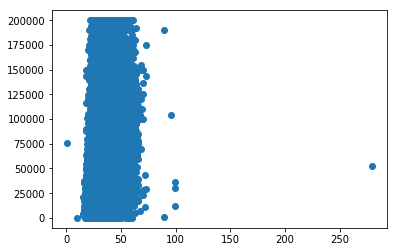

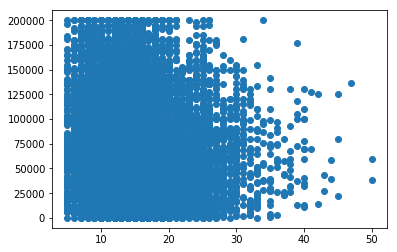

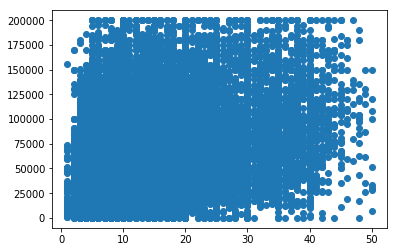

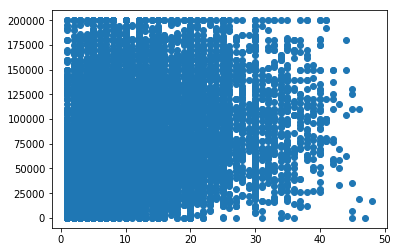

In [443]:
# # fig, ax=plt.subplots(math.ceil(len(numericals)/2), 2)
# # plt.subplots(math.ceil(5/2), 2)
for idx, each_col in enumerate(numericals): 
#     plt.scatter(input_ary[each_col], y, ax=ax[int(idx/2)][int(idx%2)])
    plt.scatter(input_ary[each_col], y)
    plt.show()
#     print(ax[0][0])

In [444]:
# X=df[['ConvertedComp']]
X=df[(df['ConvertedComp']<=200000)][['ConvertedComp']]
for each_col in numericals:
    X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
for each_col in categoricals: 
    X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
for each_col in multi_options: 
    X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    

In [445]:
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
sorted(input_ary.columns)

(27075, 264)


['A business discipline (such as accounting, finance, marketing, etc.)',
 'A health science (such as nursing, pharmacy, radiology, etc.)',
 'A humanities discipline (such as literature, history, philosophy, etc.)',
 'A natural science (such as biology, chemistry, physics, etc.)',
 'A social science (such as anthropology, psychology, political science, etc.)',
 'Academic researcher',
 'Afghanistan',
 'Age',
 'Age1stCode',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Assembly',
 'Associate degree (A.A., A.S., etc.)',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Bash/Shell/PowerShell',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Bur

In [446]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

Train Score: 0.9516259295000786
Test Score: 0.6482170053053373


In [447]:
sorted(list(zip(rfr.feature_importances_, input_ary.columns)), reverse=True)

[(0.34234818442721426, 'United States'),
 (0.13309143731434592, 'YearsCodePro'),
 (0.0485540948709027, 'YearsCode'),
 (0.0374848090104819, 'Age'),
 (0.030109657506059647, 'Age1stCode'),
 (0.016924713786657886, 'United Kingdom'),
 (0.016779861008680327, 'India'),
 (0.013973130489249353, 'Switzerland'),
 (0.013957653384730853, 'Israel'),
 (0.012826567395588516, 'Canada'),
 (0.012555512087796957, 'Germany'),
 (0.011439850425519505, 'PHP'),
 (0.010587958297195967, 'Australia'),
 (0.007328639506604732, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
 (0.007226351893703807, 'Engineering manager'),
 (0.007187078946828973, 'C#'),
 (0.006821250116190789, 'Netherlands'),
 (0.006483496034631959, 'Go'),
 (0.006448857920244697, 'Denmark'),
 (0.006278766459244175, 'SQL'),
 (0.006192233399842046, 'Bash/Shell/PowerShell'),
 (0.006045622821159442, 'HTML/CSS'),
 (0.006036995390395046, 'Norway'),
 (0.005687596504197344, 'Java'),
 (0.005575149471638511, 'TypeScript'),
 (0.005516457096745995, 'Python')

In [448]:
sample=random.randint(0, len(input_ary))
print(f'Sample {sample}: Predicted {rfr.predict([input_ary.iloc[sample]])} vs. Actual {y.iloc[sample]}')

Sample 16853: Predicted [61905.95] vs. Actual 57072.0


# Linear Regression

In [449]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-2939754906219.176

In [450]:
# sorted(list(zip(lr.feature_importances_, input_ary.columns)), reverse=True)

In [456]:
sample=random.randint(0, len(input_ary))
print(f'Sample {sample}: Predicted {lr.predict([input_ary.iloc[sample]])} vs. Actual {y.iloc[sample]}')

Sample 2643: Predicted [42432.5] vs. Actual 41508.0


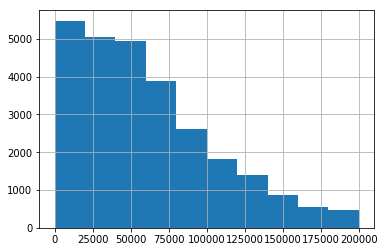

In [452]:
y.hist()

In [472]:
sorted(list(zip(lr.coef_, input_ary.columns)), reverse=True)

[(1390846546860137.2, 'I am a developer by profession'),
 (1390846546858619.2,
  'I am not primarily a developer, but I write code sometimes as part of my work'),
 (213654972026258.03, 'I am a student who is learning to code'),
 (100980273845895.53,
  'I used to be a developer by profession, but no longer am'),
 (11693568495195.732, 'I code primarily as a hobby'),
 (6012657455341.909, 'Belize'),
 (1603670279427.7798, 'Gabon'),
 (531143077827.9516, 'Guinea'),
 (85100727504.83842, 'Fiji'),
 (47713010541.997604, 'Kiribati'),
 (10063463870.644022, 'Libyan Arab Jamahiriya'),
 (413589940.54279643, 'Mali'),
 (272354639.2016173, 'Mozambique'),
 (65994845.516341284, 'Nauru'),
 (13639.34375, 'Engineering manager'),
 (12158.152845288576, 'I never completed any formal education'),
 (11836.51287988103, 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
 (10575.489255351222, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
 (8477.8125, 'Scala'),
 (8390.5575997095, 'Primary/elementary school'),
 (7299

In [468]:
y_test.max()

200000.0

In [467]:
import numpy as np
np.max(lr.predict(X_test))

3258380485347.75

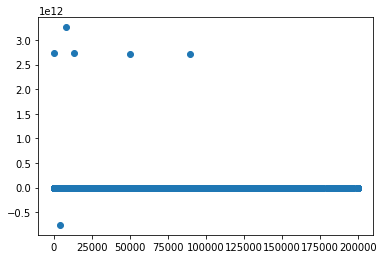

In [457]:
plt.scatter(y_test, lr.predict(X_test))

In [430]:
print(categoricals)
print(numericals)
print(multi_options)

['MainBranch', 'EdLevel', 'UndergradMajor', 'Country']
['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
[]


['MainBranch', 'EdLevel', 'UndergradMajor', 'Country']

['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

[]

LR - -244864609971947.5

RFR - 0.6037828435133481

In [91]:
list(input_ary.columns)

['Age',
 'Age1stCode',
 'YearsCode',
 'YearsCodePro',
 'I am a developer by profession',
 'I am a student who is learning to code',
 'I am not primarily a developer, but I write code sometimes as part of my work',
 'I code primarily as a hobby',
 'I used to be a developer by profession, but no longer am',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo, Republic of the...',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',

In [24]:
categoricals={}
for col, col_type in df.dtypes.iteritems(): 
    if col_type=='O':
        categoricals[col]=df[col].nunique()
#         print(f'{col} is {col_type}')
        
categoricals

{'MainBranch': 5,
 'Hobbyist': 2,
 'Age1stCode': 63,
 'CompFreq': 3,
 'Country': 183,
 'CurrencyDesc': 142,
 'CurrencySymbol': 141,
 'DatabaseDesireNextYear': 3193,
 'DatabaseWorkedWith': 2808,
 'DevType': 8269,
 'EdLevel': 9,
 'Employment': 7,
 'Ethnicity': 208,
 'Gender': 7,
 'JobFactors': 230,
 'JobSat': 5,
 'JobSeek': 3,
 'LanguageDesireNextYear': 16243,
 'LanguageWorkedWith': 14256,
 'MiscTechDesireNextYear': 5216,
 'MiscTechWorkedWith': 2730,
 'NEWCollabToolsDesireNextYear': 1277,
 'NEWCollabToolsWorkedWith': 1153,
 'NEWDevOps': 3,
 'NEWDevOpsImpt': 5,
 'NEWEdImpt': 5,
 'NEWJobHunt': 2172,
 'NEWJobHuntResearch': 63,
 'NEWLearn': 4,
 'NEWOffTopic': 3,
 'NEWOnboardGood': 3,
 'NEWOtherComms': 2,
 'NEWOvertime': 5,
 'NEWPurchaseResearch': 63,
 'NEWPurpleLink': 4,
 'NEWSOSites': 61,
 'NEWStuck': 444,
 'OpSys': 4,
 'OrgSize': 9,
 'PlatformDesireNextYear': 7471,
 'PlatformWorkedWith': 6287,
 'PurchaseWhat': 3,
 'Sexuality': 14,
 'SOAccount': 3,
 'SOComm': 6,
 'SOPartFreq': 6,
 'SOVisitF

In [74]:
ohe.get_feature_names()

array(['x0_Man',
       'x0_Man;Non-binary, genderqueer, or gender non-conforming',
       'x0_Non-binary, genderqueer, or gender non-conforming', 'x0_Woman',
       'x0_Woman;Man',
       'x0_Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'x0_Woman;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [75]:
df['Gender'].str.get_dummies(sep=';')

,Man,"Non-binary, genderqueer, or gender non-conforming",Woman
0,1,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
64456,0,0,0
64457,0,0,0
64458,0,0,0
64459,0,0,0


In [53]:
for each_col in categoricals: 
    if categoricals[each_col]<100: 
        print(f'{each_col} options: {df[each_col].unique()}')
        print('='*20)

MainBranch options: ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan]
Hobbyist options: ['Yes' 'No' nan]
Age1stCode options: ['13' '19' '15' '18' '16' '14' '12' '20' '42' '8' '25' '22' '30' '17' '21'
 '10' '46' '9' '7' '11' '6' nan '31' '29' '5' 'Younger than 5 years' '28'
 '38' '23' '27' '41' '24' '53' '26' '35' '32' '40' '33' '36' '54' '48'
 '56' '45' '44' '34' 'Older than 85' '39' '51' '68' '50' '37' '47' '43'
 '52' '85' '64' '55' '58' '49' '76' '72' '73' '83' '63']
CompFreq options: ['Monthly' nan 'Yearly' 'Weekly']
EdLevel options: ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' nan
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, etc.)'
 'Some college/university st

In [44]:
comp_cols=['CompFreq','CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc','CurrencySymbol']
comp_df=df[comp_cols].dropna()
comp_df[comp_df['CompFreq']=='Weekly']

,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol
85,Weekly,2.000000e+03,108100.0,France,European Euro,EUR
121,Weekly,1.200000e+05,2000000.0,United States,United States dollar,USD
132,Weekly,3.250000e+03,210050.0,United Kingdom,Pound sterling,GBP
173,Weekly,7.600000e+02,41100.0,Netherlands,European Euro,EUR
191,Weekly,1.200000e+05,2000000.0,United States,United States dollar,USD
...,...,...,...,...,...,...
63762,Weekly,1.600000e+03,80000.0,United States,United States dollar,USD
63925,Weekly,8.740000e+09,1000000.0,Afghanistan,Afghan afghani,AFN
63993,Weekly,5.521171e+09,1000000.0,Afghanistan,Afghan afghani,AFN
64035,Weekly,6.600000e+04,2000000.0,United States,United States dollar,USD


(-2000.001, 100000.0]     26847
(100000.0, 200000.0]       5603
(200000.0, 300000.0]        686
(900000.0, 1000000.0]       338
(1900000.0, 2000000.0]      265
(300000.0, 400000.0]        235
(400000.0, 500000.0]        159
(500000.0, 600000.0]        154
(600000.0, 700000.0]        133
(700000.0, 800000.0]        110
(800000.0, 900000.0]         93
(1400000.0, 1500000.0]       22
(1100000.0, 1200000.0]       22
(1000000.0, 1100000.0]       21
(1200000.0, 1300000.0]       17
(1700000.0, 1800000.0]       14
(1300000.0, 1400000.0]       13
(1600000.0, 1700000.0]       13
(1500000.0, 1600000.0]        6
(1800000.0, 1900000.0]        5
Name: ConvertedComp, dtype: int64

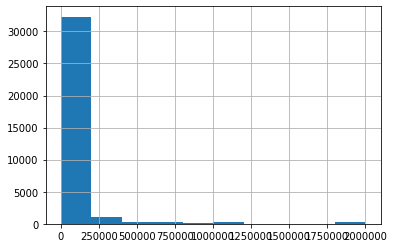

In [52]:
# comp_df[comp_df['ConvertedComp']<500000]['ConvertedComp'].hist()
# comp_df[comp_df['ConvertedComp']<500000]['ConvertedComp'].value_counts(bins=10)
comp_df['ConvertedComp'].hist()
comp_df['ConvertedComp'].value_counts(bins=20)

In [35]:
currency_api_url='https://api.exchangeratesapi.io/latest?base=USD'
response=requests.get(currency_api_url)
currency_conv=response.json()['rates']
currency_conv

{'CAD': 1.2857142857,
 'HKD': 7.7506373879,
 'ISK': 125.0925240563,
 'PHP': 48.0549387285,
 'DKK': 6.1213093182,
 'HUF': 294.9008964553,
 'CZK': 21.8093593223,
 'GBP': 0.7425117197,
 'RON': 4.0073196809,
 'SEK': 8.4363845711,
 'IDR': 14164.2980508265,
 'INR': 73.7523645037,
 'BRL': 5.1615264413,
 'RUB': 74.0750884119,
 'HRK': 6.2024015133,
 'JPY': 103.9888148696,
 'THB': 30.1603750308,
 'CHF': 0.8900402994,
 'EUR': 0.8224360556,
 'MYR': 4.0600378321,
 'BGN': 1.6085204375,
 'TRY': 7.7832058557,
 'CNY': 6.5318693972,
 'NOK': 8.7670038654,
 'NZD': 1.4190311703,
 'ZAR': 15.1882556131,
 'USD': 1.0,
 'MXN': 19.828193108,
 'SGD': 1.3328398717,
 'AUD': 1.3477259643,
 'ILS': 3.2667160128,
 'KRW': 1086.109055021,
 'PLN': 3.6819639773}

In [37]:
#df['Comp_USD']=
df.dropna()
df.apply(lambda x: x['CompTotal']/currency_conv['CurrencySymbol'])# if x['CurrencySymbol'] != 'USD')

KeyError: ('CompTotal', 'occurred at index Respondent')